In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
import sys
sys.path.append('./lib')
from lib.cleaning import *
from lib.data_prepration import *
from lib.paralellism import *
from lib.mydoc2vec import *
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

from gensim.models import Doc2Vec
from collections import namedtuple
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#!pip install scipy==1.12
SEED = 448

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
"""
!pip install pandarallel
!pip install nltk 
!python.exe -m pip install --upgrade pip
!pip install gensim
!pip install scipy==1.12 --upgrade"""

In [2]:

keep_cols=['title', 'price', 'helpfulness', 'score', 'time',
       'summary', 'text', 'description', 'authors', 'publisher',
       'publisheddate', 'categories', 'ratingscount']
file_path = '../data/book_review.csv'
data_prep = DataPreparation(file_path)
data_prep.clean_and_preprocess(True)
data_prep.Normalize()
data_prep.data=data_prep.data[keep_cols]

#data_prep.data=data_prep.data.sample(frac=0.3,random_state=SEED)
data_prep.data.categories.value_counts().sum()

2359775

In [3]:
copied=data_prep.data.copy()

In [4]:
#data_prep.data['categories']=data_prep.data['categories'].apply(lambda x: x.lower().replace(']','').replace('[','') if isinstance(x, str) else x)
data_prep.data.categories.value_counts()

categories
[Fiction]                      815445
[Juvenile Fiction]             205925
[]                             115970
[Biography & Autobiography]    104284
[Religion]                      94700
                                ...  
[Bayous]                            1
[Bethlehem (Pa.)]                   1
[Computer-aided design]             1
[Westchester County (N.Y.)]         1
[Concepts]                          1
Name: count, Length: 5416, dtype: int64

In [5]:
data_prep.data=copied
d_not_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction' not in x)].sample(frac=0.4)
d_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction'  in x)].sample(frac=0.1)
d_not_fic.categories.value_counts().sum(),d_fic.categories.value_counts().sum()


(617732, 81544)

In [6]:
balanced=pd.concat([d_not_fic,d_fic], ignore_index=True)
balanced.to_csv('../data/balanced.csv')

In [7]:
balanced

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
0,harry potter and the chamber of secrets,21.762656,,5.0,1999-11-03,"in school, all my free-time was spent with my ...","i really think that ron, harry &amp; hermine p...","witchcraft, wizardry - fiction.",[J. K. Rowling],raincoast books,2009-10-13,[Juvenile Fiction],14.000000
1,"dreamweaver 2 for windows & macintosh, second ...",21.762656,0.666667,5.0,1999-09-01,"too much cutesy language, not enough information","at the school where i teach, we use many of th...","este livro é sobre o dreamweaver, um software ...",[J. Tarin Towers],,2018-04-04,[],272.064662
2,esperanza rising,21.762656,1.0,4.0,2007-09-10,"yo, yo,yo!! by jacky-boy","yo, yo, yo, pay attention i'm telling you abou...",esperanza rising joins the scholastic gold lin...,[Pam Muñoz Ryan],scholastic inc.,2012-10-01,[Juvenile Fiction],396.000000
3,the hobbit,21.762656,,5.0,2013-01-31,read again,the original masterpiece is still amazing afte...,celebrating 75 years of one of the world's mos...,[J. R. R. Tolkien],mariner books,2009-01-01,[Juvenile Fiction],2580.000000
4,philosophies of india,21.762656,0.888889,5.0,2000-06-22,tour de force - no holds barred,"the book, of course, is a classic.heinrich zim...",a princeton classics edition of an essential w...,[Heinrich Robert Zimmer],princeton university press,2020-02-25,[Philosophy],272.064662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699271,pride and prejudice,21.762656,,4.0,2013-01-23,better,they sent me the wrong book but they were quic...,"in early nineteenth-century england, a spirite...",[Jane Austen],courier corporation,1995-01-01,[Fiction],7.000000
699272,becoming finola,22.950000,,5.0,2012-11-17,a love story i'll not soon forget,"in an era where ""popcorn"" books abound, it was...",in the latest novel from the award-winning aut...,[Suzanne Strempek Shea],simon and schuster,2010-05-11,[Fiction],2.000000
699273,the pact: a love story,21.762656,,5.0,2009-06-23,the pact is amazing!,"i thought the book, the pact, was a very good ...",“engrossing...the pact is compelling reading.”...,[Jodi Picoult],harper collins,2009-10-06,[Fiction],127.000000
699274,"crossroads of twilight (the wheel of time, boo...",21.762656,0.148148,5.0,2003-03-25,wtf?,i recall spending a great deal of time grinnin...,the wheel of time ® is a pbs great american re...,[Robert Jordan],tor fantasy,2010-07-20,[Fiction],65.000000


In [8]:
data_prep.data=balanced

In [ ]:
"""

keep_cols=['title', 'price', 'helpfulness', 'score', 'time',
       'summary', 'text', 'description', 'authors', 'publisher',
       'publisheddate', 'categories', 'ratingscount']
file_path = '../data/one_half.csv'
data_prep = DataPreparation(file_path)
data_prep.read_large_csv()
random.seed(SEED)

data_prep.data=data_prep.data[keep_cols]
data_prep.data"""

In [9]:
data_prep.data.columns

Index(['title', 'price', 'helpfulness', 'score', 'time', 'summary', 'text',
       'description', 'authors', 'publisher', 'publisheddate', 'categories',
       'ratingscount'],
      dtype='object')

In [10]:
len(data_prep.data)

699276

In [11]:
print(len(data_prep.data))
print(data_prep.data.info())
print(data_prep.data.describe())

699276
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699276 entries, 0 to 699275
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   title          699276 non-null  object        
 1   price          699276 non-null  float64       
 2   helpfulness    699276 non-null  object        
 3   score          699276 non-null  float64       
 4   time           699276 non-null  datetime64[ns]
 5   summary        699276 non-null  object        
 6   text           699276 non-null  object        
 7   description    699276 non-null  object        
 8   authors        699276 non-null  object        
 9   publisher      699276 non-null  object        
 10  publisheddate  699276 non-null  datetime64[ns]
 11  categories     699276 non-null  object        
 12  ratingscount   699276 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 69.4+ MB
None
               price     

In [12]:
data_prep.data.isnull().sum()

title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
dtype: int64

In [13]:
data_prep.data.score.value_counts()

score
5.0    434035
4.0    130802
3.0     55220
1.0     46149
2.0     33070
Name: count, dtype: int64

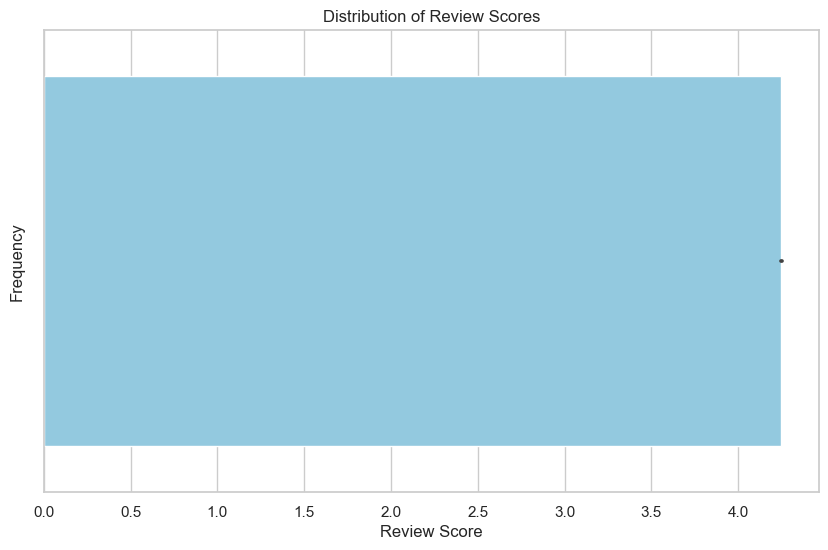

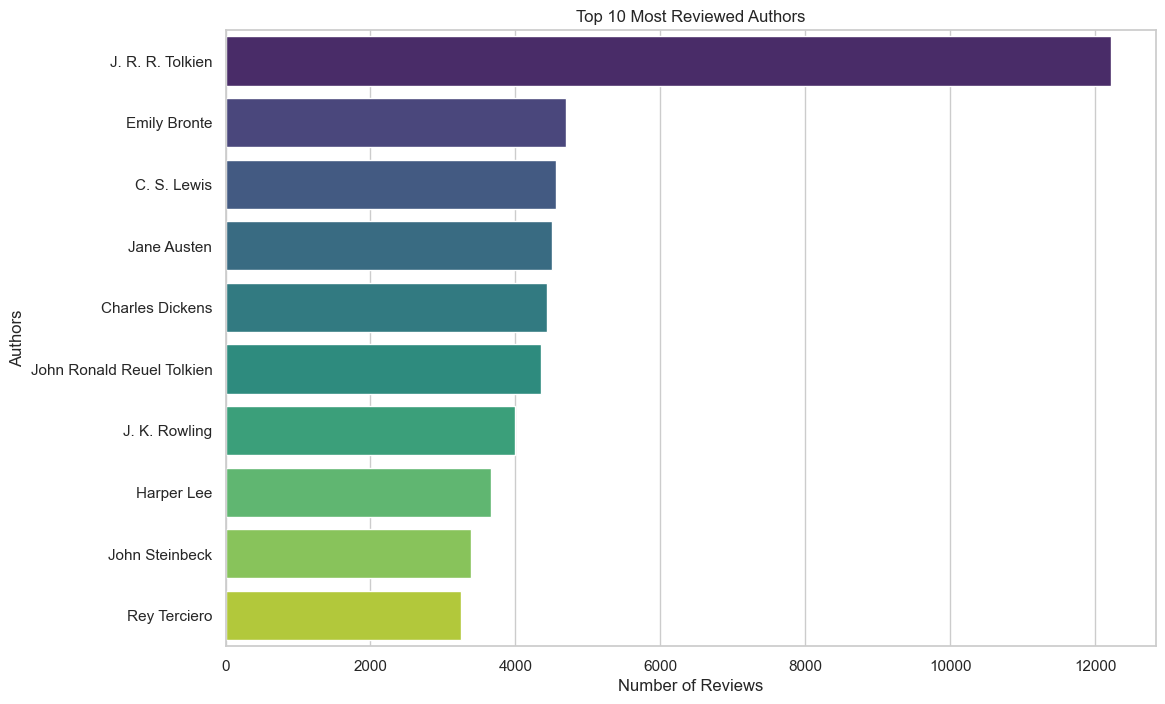

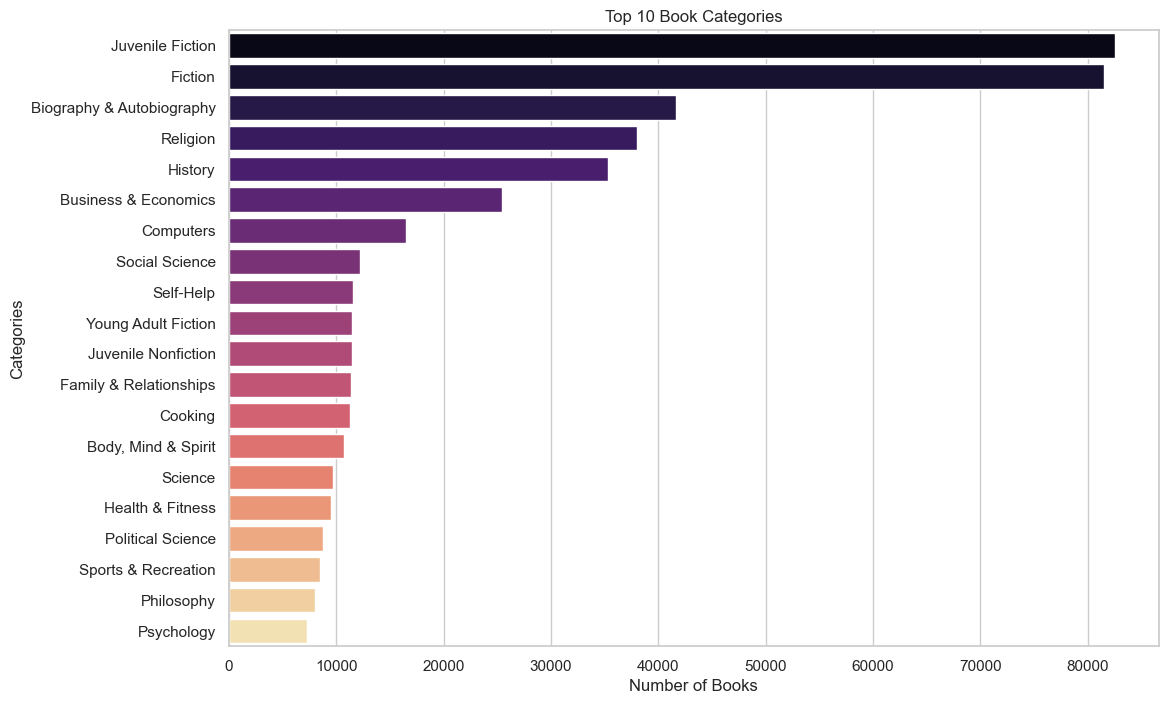

In [14]:
data_prep.generate_plots()

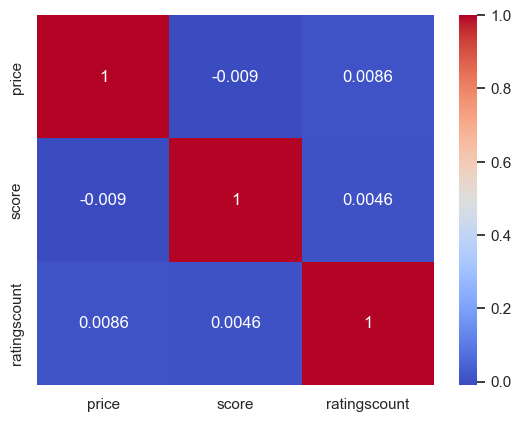

In [15]:
corr_matrix = data_prep.data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
join_func = lambda x: ', '.join(map(str, x))
data_prep.data['all']=data_prep.data['title'] + data_prep.data['description'] + data_prep.data['authors'].apply(join_func)+data_prep.data['categories'].apply(join_func)
data_prep.data['all']


0         harry potter and the chamber of secretswitchcr...
1         dreamweaver 2 for windows & macintosh, second ...
2         esperanza risingesperanza rising joins the sch...
3         the hobbitcelebrating 75 years of one of the w...
4         philosophies of indiaa princeton classics edit...
                                ...                        
699271    pride and prejudicein early nineteenth-century...
699272    becoming finolain the latest novel from the aw...
699273    the pact: a love story“engrossing...the pact i...
699274    crossroads of twilight (the wheel of time, boo...
699275    the second chairdismas hardy becomes involved ...
Name: all, Length: 699276, dtype: object

In [17]:

_doc2vec = Doc2VecRecommender()
testdata=_doc2vec.train(data_prep.data)


In [18]:
_doc2vec.model.save("./models/doc2vec_model_hole")

In [19]:
_doc2vec_load = Doc2VecRecommender(data_prep.data)
_doc2vec_load.load_model('./models/doc2vec_model_hole')


In [25]:
search='forrest bird jungle without lion and wolf'
_doc2vec_load.recommend_by_text([search]) 

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount,all
508596,the making of the president 1960,21.762656,1.0,5.0,2005-03-19,"superb, romantic and exciting",journalist theodore h. white (1915-1986) captu...,"a harper perennial political classic, the maki...",[Theodore H. White],harper collins,2009-11-03,[Political Science],13.000000,the making of the president 1960a harper peren...
462080,morality and the good life: an introduction to...,21.762656,0.833333,5.0,2002-05-27,a keeper.,"this was a textbook in my ethics class, and is...",the premise of this ethical theory anthology i...,"[Robert C. Solomon, Clancy W. Martin]","mcgraw-hill humanities, social sciences & worl...",2010-09-15,[Ethics.],272.064662,morality and the good life: an introduction to...
116197,a peculiar treasure,21.762656,1.0,5.0,2003-10-14,a treasure and pleasure to read,"edna ferber was born in kalamazoo, mich., aug....",pulitzer prize winner edna ferber's stunning f...,[Edna Ferber],vintage,2014-03-04,[Biography & Autobiography],1.000000,a peculiar treasurepulitzer prize winner edna ...
147540,"ultimate frontier, the",21.762656,0.5,5.0,2000-03-08,book helps you learn and grow,this book has influenced me more than any book...,"this is a new, updated edition of the great me...",[Eklal Kueshana],,1992-03-01,[Philosophy],272.064662,"ultimate frontier, thethis is a new, updated e..."
74519,flea market decorating: creating style with vi...,21.762656,0.956522,5.0,2000-05-18,"very sophisticated yet very user friendly, too",gorgeous photos. sophisticated but filled with...,hundreds of illustrated ideas for decorating w...,[Vicki L. Ingham],better homes & gardens books,2010-08-01,[House & Home],272.064662,flea market decorating: creating style with vi...
568475,the little prince,21.762656,1.0,5.0,1999-01-15,"a book to grow up with, to be young with, and ...","i am lebanese, aged 24, and been therough all ...","hello, i am the little prince. bonjour, je sui...",[Antoine de Saint-Exupery],hmh books for young readers,2015-10-13,[Juvenile Fiction],272.064662,"the little princehello, i am the little prince..."
141133,fox in socks,21.762656,,1.0,2013-01-23,no cartridge,i ordered this book for my son and it came wit...,this classic dr. seuss beginner book features ...,[Dr. Seuss],random house books for young readers,2015-07-28,[Juvenile Fiction],39.000000,fox in socksthis classic dr. seuss beginner bo...
182651,somatics: reawakening the mind's control of mo...,11.800000,1.0,5.0,2007-08-11,easy and surprisingly effective,"i'd tried everything common for my back, witho...","in the revolutionary somatics, thomas hanna de...",[Thomas Hanna],da capo press,2004-08-04,[Health & Fitness],1.000000,somatics: reawakening the mind's control of mo...
76721,the witch of blackbird pond,21.762656,,4.0,2003-02-11,the witch of blackbird pond,can you believe the great book i have just fin...,"in 1687 in connecticut, kit tyler, feeling out...",[Elizabeth George Speare],houghton mifflin harcourt,2020-07-31,[Juvenile Fiction],109.000000,the witch of blackbird pondin 1687 in connecti...
533520,tangerine,21.762656,,4.0,2006-03-17,tangerine is a masterpiece and a must read,what happened to paul's eyes? is erik really e...,"twelve-year-old paul, who lives in the shadow ...",[Edward Bloor],houghton mifflin harcourt,2002-05-02,[Juvenile Fiction],74.000000,"tangerinetwelve-year-old paul, who lives in th..."


In [24]:
data_prep.data=data_prep.data.reset_index()
data_prep.data

,index,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount,all
0,0,harry potter and the chamber of secrets,21.762656,,5.0,1999-11-03,"in school, all my free-time was spent with my ...","i really think that ron, harry &amp; hermine p...","witchcraft, wizardry - fiction.",[J. K. Rowling],raincoast books,2009-10-13,[Juvenile Fiction],14.000000,harry potter and the chamber of secretswitchcr...
1,1,"dreamweaver 2 for windows & macintosh, second ...",21.762656,0.666667,5.0,1999-09-01,"too much cutesy language, not enough information","at the school where i teach, we use many of th...","este livro é sobre o dreamweaver, um software ...",[J. Tarin Towers],,2018-04-04,[],272.064662,"dreamweaver 2 for windows & macintosh, second ..."
2,2,esperanza rising,21.762656,1.0,4.0,2007-09-10,"yo, yo,yo!! by jacky-boy","yo, yo, yo, pay attention i'm telling you abou...",esperanza rising joins the scholastic gold lin...,[Pam Muñoz Ryan],scholastic inc.,2012-10-01,[Juvenile Fiction],396.000000,esperanza risingesperanza rising joins the sch...
3,3,the hobbit,21.762656,,5.0,2013-01-31,read again,the original masterpiece is still amazing afte...,celebrating 75 years of one of the world's mos...,[J. R. R. Tolkien],mariner books,2009-01-01,[Juvenile Fiction],2580.000000,the hobbitcelebrating 75 years of one of the w...
4,4,philosophies of india,21.762656,0.888889,5.0,2000-06-22,tour de force - no holds barred,"the book, of course, is a classic.heinrich zim...",a princeton classics edition of an essential w...,[Heinrich Robert Zimmer],princeton university press,2020-02-25,[Philosophy],272.064662,philosophies of indiaa princeton classics edit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699271,699271,pride and prejudice,21.762656,,4.0,2013-01-23,better,they sent me the wrong book but they were quic...,"in early nineteenth-century england, a spirite...",[Jane Austen],courier corporation,1995-01-01,[Fiction],7.000000,pride and prejudicein early nineteenth-century...
699272,699272,becoming finola,22.950000,,5.0,2012-11-17,a love story i'll not soon forget,"in an era where ""popcorn"" books abound, it was...",in the latest novel from the award-winning aut...,[Suzanne Strempek Shea],simon and schuster,2010-05-11,[Fiction],2.000000,becoming finolain the latest novel from the aw...
699273,699273,the pact: a love story,21.762656,,5.0,2009-06-23,the pact is amazing!,"i thought the book, the pact, was a very good ...",“engrossing...the pact is compelling reading.”...,[Jodi Picoult],harper collins,2009-10-06,[Fiction],127.000000,the pact: a love story“engrossing...the pact i...
699274,699274,"crossroads of twilight (the wheel of time, boo...",21.762656,0.148148,5.0,2003-03-25,wtf?,i recall spending a great deal of time grinnin...,the wheel of time ® is a pbs great american re...,[Robert Jordan],tor fantasy,2010-07-20,[Fiction],65.000000,"crossroads of twilight (the wheel of time, boo..."


In [26]:
data_prep.data.to_csv('../data/cleared_columns.csv')

In [27]:
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
def preprocess(sentence,lemmatizer,stop_words_temp=stop_words):
    
    tokens = nltk.word_tokenize(sentence,language='english')
    tokens=[word for word in tokens if word not in stop_words_temp]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

lemmatizer = WordNetLemmatizer()

documents = [TaggedDocument(preprocess(doc,lemmatizer), [i]) for i, doc in enumerate(data_prep.data['all'])]
def filter_strings_by_length(lst):
    return [item for item in lst if len(item) > 2]
dts=[' '.join(filter_strings_by_length(d.words)) for d in documents]
data_prep.data['all_clear']=dts


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
data_prep.data['all_clear']

0         harry potter chamber secretswitchcraft wizardr...
1         dreamweaver window macintosh second edition vi...
2         esperanza risingesperanza rising join scholast...
3         hobbitcelebrating year one world treasured cla...
4         philosophy indiaa princeton classic edition es...
                                ...                        
699271    pride prejudicein early nineteenth-century eng...
699272    becoming finolain latest novel award-winning a...
699273    pact love story engrossing ... pact compelling...
699274    crossroad twilight wheel time book wheel time ...
699275    second chairdismas hardy becomes involved case...
Name: all_clear, Length: 699276, dtype: object

In [29]:
data_prep.data.to_csv('../data/cleared_columns.csv')